## Prophet for business forecasting

In [15]:
#!pip install prophet

## Load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# If you use your local computer, use this. You will need to download the data to your local folder.
path = '/Users/chriskuo/Documents/Documents/My_documents_all/Book_neural_network_time_series_anomaly_detection/data'
data = pd.read_csv(path + '/daily-website-visitors.csv',  thousands=',')
#data['ts'] = pd.to_datetime(data['Period'], format='%d.%m.%Y', errors='coerce')
# convert string to datetime64 
data["Date"] = pd.to_datetime(data["Date"])
data = data[['First.Time.Visits','Date']]
data.columns = ['y','ds']
data['y'] = pd.to_numeric(data['y'], errors='coerce')
data = data[data['ds']>=pd.to_datetime('2017-01-01')]
data = data.sort_values(by='ds')
data

,y,ds
840,832,2017-01-01
841,1448,2017-01-02
842,1970,2017-01-03
843,2226,2017-01-04
844,2058,2017-01-05
...,...,...
2162,1373,2020-08-15
2163,1686,2020-08-16
2164,2181,2020-08-17
2165,2184,2020-08-18


In [2]:
data.dtypes

y              int64
ds    datetime64[ns]
dtype: object

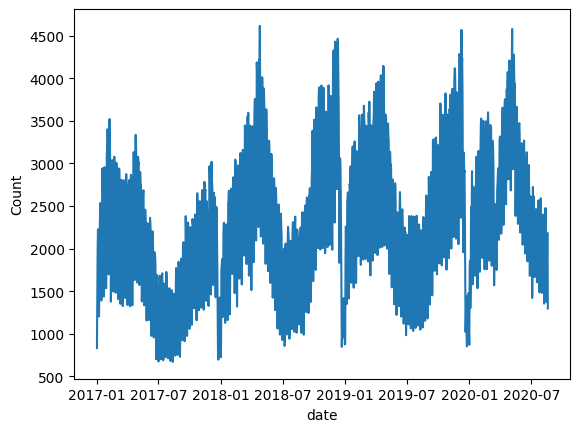

In [3]:
# create line plot of sales data
plt.plot(data['ds'], data["y"])
plt.xlabel("date")
plt.ylabel("Count")
plt.show()

### In-time and out-of-time data split

In [4]:
train_len = int(data.shape[0] * 0.85)
train = data.iloc[:train_len,:]
test = data.iloc[train_len:,:]
[train_len, len(test)]

[1127, 200]

In [5]:
train.tail()

,y,ds
1962,3148,2020-01-28
1963,3025,2020-01-29
1964,3031,2020-01-30
1965,2304,2020-01-31
1966,1728,2020-02-01


In [6]:
test.tail()

,y,ds
2162,1373,2020-08-15
2163,1686,2020-08-16
2164,2181,2020-08-17
2165,2184,2020-08-18
2166,1297,2020-08-19


## Modeling 

In [7]:
from prophet import Prophet
# Fitting with default parameters
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(train)

# Generate data points for the future period
future= m.make_future_dataframe(periods=len(test), freq='d')
future.tail()

# Apply the model to forecast the 20 future data points
forecast=m.predict(future)
forecast.tail()

/Users/chriskuo/anaconda3/envs/time_series/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
14:29:27 - cmdstanpy - INFO - Chain [1] start processing
14:29:27 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1322,2020-08-15,2520.448667,531.958492,1317.417687,2326.510749,2709.958357,0.0,0.0,0.0,0.0,...,-919.178791,-919.178791,-919.178791,-685.001872,-685.001872,-685.001872,0.0,0.0,0.0,916.268005
1323,2020-08-16,2520.360098,1045.913066,1774.668714,2325.181982,2711.992473,0.0,0.0,0.0,0.0,...,-469.819035,-469.819035,-469.819035,-677.544571,-677.544571,-677.544571,0.0,0.0,0.0,1372.996491
1324,2020-08-17,2520.271528,1895.244179,2673.888203,2322.474692,2712.902829,0.0,0.0,0.0,0.0,...,425.117208,425.117208,425.117208,-670.074228,-670.074228,-670.074228,0.0,0.0,0.0,2275.314508
1325,2020-08-18,2520.182959,1918.069150,2733.370287,2320.277027,2713.950142,0.0,0.0,0.0,0.0,...,472.940813,472.940813,472.940813,-662.613406,-662.613406,-662.613406,0.0,0.0,0.0,2330.510366
1326,2020-08-19,2520.094389,1927.610534,2688.460962,2318.536022,2716.001587,0.0,0.0,0.0,0.0,...,435.699464,435.699464,435.699464,-655.154461,-655.154461,-655.154461,0.0,0.0,0.0,2300.639393


### Visualization

/Users/chriskuo/anaconda3/envs/time_series/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/chriskuo/anaconda3/envs/time_series/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


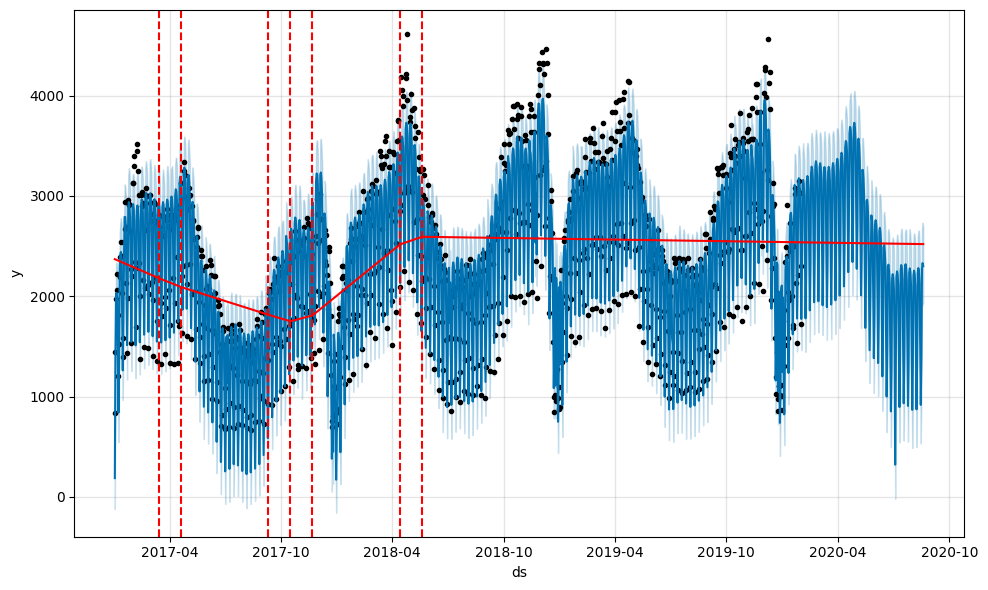

In [8]:
from prophet.plot import add_changepoints_to_plot
fig= m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Interpretation

/Users/chriskuo/anaconda3/envs/time_series/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/chriskuo/anaconda3/envs/time_series/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/chriskuo/anaconda3/envs/time_series/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

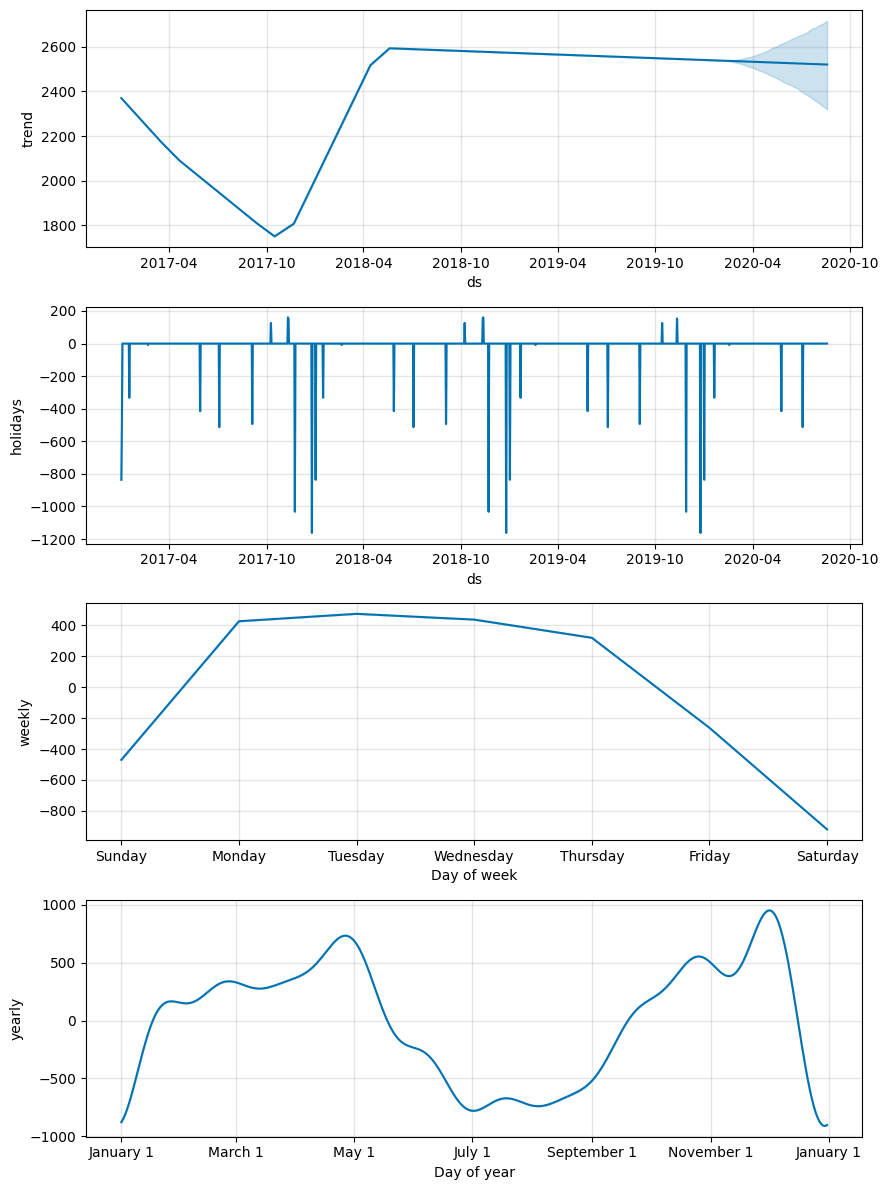

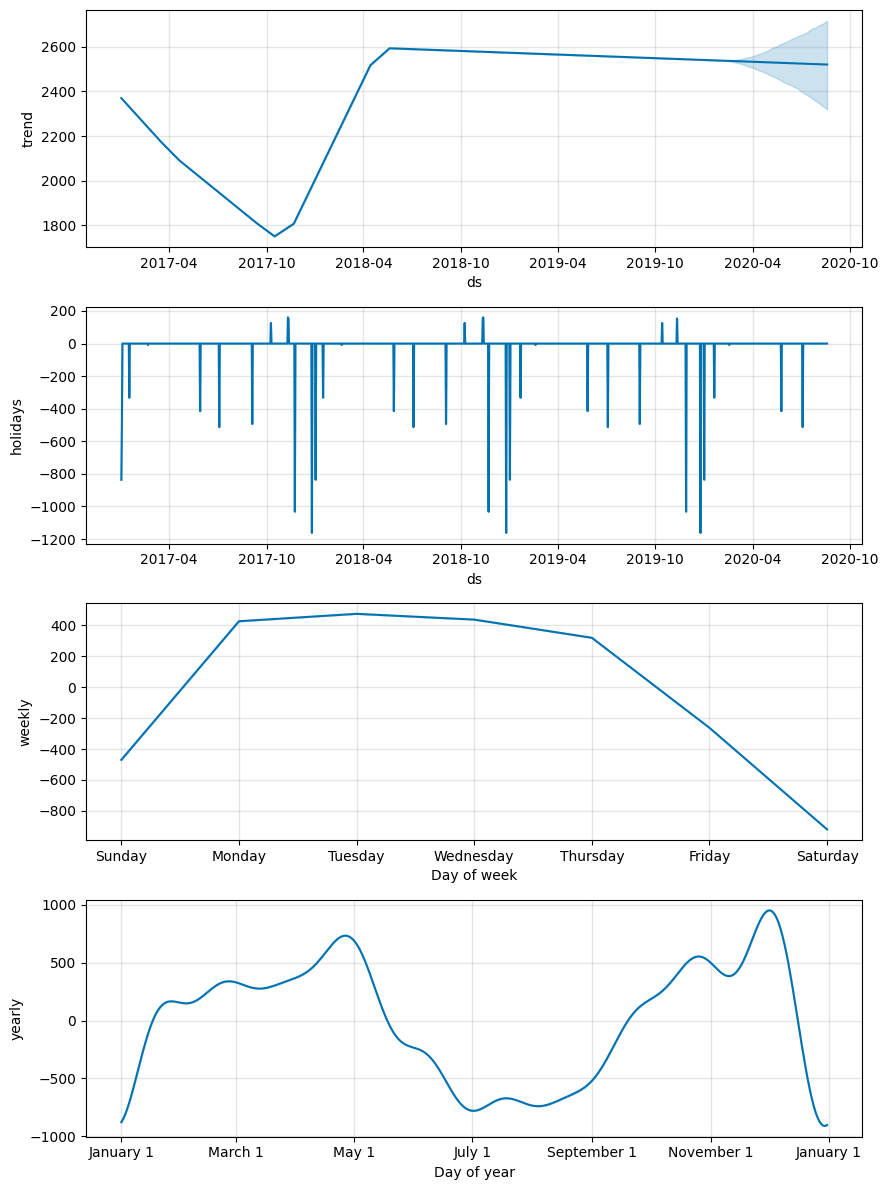

In [9]:
m.plot_components(forecast)

## Out-of-time performance

In [10]:
from sklearn import metrics
mape = metrics.mean_absolute_percentage_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
mae = metrics.mean_absolute_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
mse = metrics.mean_squared_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))

print(f' mape: {mape}')
print(f'mae : {mae}')
print(f'mse : {mse}')

 mape: 0.15783652705190943
mae : 397.9044808468297
mse : 239356.14747815428


## Diagnostics

In [13]:
# Diagnostics
from prophet.diagnostics import cross_validation
m_cv = cross_validation(m, 
                         initial='100 days', 
                         period='180 days', 
                         horizon = '365 days')
m_cv.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/4 [00:00<?, ?it/s]14:33:49 - cmdstanpy - INFO - Chain [1] start processing
14:33:49 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:00<00:00,  4.83it/s]14:33:49 - cmdstanpy - INFO - Chain [1] start processing
14:33:49 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:00<00:00,  5.03it/s]14:33:50 - cmdstanpy - INFO - Chain [1] start processing
14:33:50 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 3/4 [00:00<00:00,  4.70it/s]14:33:50 - cmdstanpy - INFO - Chain [1] start processing
14:33:50 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 4/4 [00:00<00:00,  4.83it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-08-11,886.789329,706.283525,1052.488594,1121,2017-08-10
1,2017-08-12,231.228952,52.676927,410.321258,669,2017-08-10
2,2017-08-13,592.008008,414.224038,770.178204,811,2017-08-10
3,2017-08-14,1399.694972,1225.989329,1572.848184,1346,2017-08-10
4,2017-08-15,1458.780885,1289.516126,1645.777044,1471,2017-08-10


In [14]:
# Performance 
from prophet.diagnostics import performance_metrics
m_perf = performance_metrics(m_cv)
m_perf.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,198043.329717,445.020595,334.138215,0.196185,0.114916,0.258798,0.462329
1,38 days,202963.411717,450.514608,338.027100,0.195015,0.112921,0.257006,0.458904
2,39 days,204885.726250,452.643045,340.313238,0.194266,0.112921,0.255493,0.455479
3,40 days,211725.227766,460.136097,349.884955,0.197141,0.114990,0.258812,0.438356
4,41 days,219444.931480,468.449497,358.872318,0.200031,0.116555,0.261816,0.431507


In [15]:
# Diagnostics
from prophet.diagnostics import cross_validation
m_cv = cross_validation(m, 
                         initial='100 days', 
                         period='180 days', 
                         horizon = '365 days')
# Performance 
from prophet.diagnostics import performance_metrics
m_perf = performance_metrics(m_cv)
m_perf.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/4 [00:00<?, ?it/s]14:38:09 - cmdstanpy - INFO - Chain [1] start processing
14:38:09 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:00<00:00,  6.04it/s]14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:00<00:00,  6.49it/s]14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 3/4 [00:00<00:00,  5.78it/s]14:38:10 - cmdstanpy - INFO - Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 4/4 [00:00<00:00,  5.50it/s]


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,198043.329717,445.020595,334.138215,0.196185,0.114916,0.258798,0.489726
1,38 days,202963.411717,450.514608,338.027100,0.195015,0.112921,0.257006,0.482877
2,39 days,204885.726250,452.643045,340.313238,0.194266,0.112921,0.255493,0.476027
3,40 days,211725.227766,460.136097,349.884955,0.197141,0.114990,0.258812,0.458904
4,41 days,219444.931480,468.449497,358.872318,0.200031,0.116555,0.261816,0.448630


In [16]:
from sklearn import metrics
mape = metrics.mean_absolute_percentage_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
mae = metrics.mean_absolute_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
mse = metrics.mean_squared_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))

print(f' mape: {mape}')
print(f'mae : {mae}')
print(f'mse : {mse}')

 mape: 0.15783652705190943
mae : 397.9044808468297
mse : 239356.14747815428


## Hyper-parameters

In [17]:
changepoint_prior_scale =  [0.001, 0.1, 0.2, 0.3, 0.4, 0.5]
seasonality_prior_scale = [1, 5, 10, 15] # default 10
seasonality_model = ['additive', 'multiplicative']
results = []
iteration = 1
for sm in seasonality_model:
    for s in seasonality_prior_scale:
        for cp in changepoint_prior_scale:
            m = Prophet(
                seasonality_mode = sm, 
                seasonality_prior_scale = s,
                changepoint_prior_scale = cp,
            )
            m.add_country_holidays(country_name='US')
            model = m.fit(train)
            future = model.make_future_dataframe(periods=len(test), freq='D')
            forecast = model.predict(future) 
        
            mape = metrics.mean_absolute_percentage_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
            mae = metrics.mean_absolute_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
            mse = metrics.mean_squared_error(list(test['y']), list(forecast.loc[train_len:,'yhat']))
        
            print(f'mape : {mape}')
            results.append([iteration, sm, s, cp,  mape, mae, mse])
            iteration += 1
results = pd.DataFrame(results, columns = ['iteration', 'seasonality_mode', 'seasonality_prior_scale', 'changepoint_prior_scale', 'mape', 'mae', 'mse'])

14:39:14 - cmdstanpy - INFO - Chain [1] start processing
14:39:14 - cmdstanpy - INFO - Chain [1] done processing
14:39:14 - cmdstanpy - INFO - Chain [1] start processing
14:39:14 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.12534862618724982


14:39:14 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.17595495751322612


14:39:14 - cmdstanpy - INFO - Chain [1] done processing
14:39:15 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.21259086352494427


14:39:15 - cmdstanpy - INFO - Chain [1] done processing
14:39:15 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.19969854999842362


14:39:15 - cmdstanpy - INFO - Chain [1] done processing
14:39:16 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1550360710916173


14:39:16 - cmdstanpy - INFO - Chain [1] done processing
14:39:16 - cmdstanpy - INFO - Chain [1] start processing
14:39:16 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.10654425060903612


14:39:17 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.12187184463496151


14:39:17 - cmdstanpy - INFO - Chain [1] done processing
14:39:17 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.17748084194985506


14:39:17 - cmdstanpy - INFO - Chain [1] done processing
14:39:18 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.2134182551523983


14:39:18 - cmdstanpy - INFO - Chain [1] done processing
14:39:18 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.20704959889193855


14:39:18 - cmdstanpy - INFO - Chain [1] done processing
14:39:19 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.15300186662541918


14:39:19 - cmdstanpy - INFO - Chain [1] done processing
14:39:19 - cmdstanpy - INFO - Chain [1] start processing
14:39:19 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.10780962368985485


14:39:20 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.12299807542078811


14:39:20 - cmdstanpy - INFO - Chain [1] done processing
14:39:20 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18036347635069233


14:39:20 - cmdstanpy - INFO - Chain [1] done processing
14:39:20 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.2104171864455392


14:39:21 - cmdstanpy - INFO - Chain [1] done processing
14:39:21 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.19377516581559512


14:39:21 - cmdstanpy - INFO - Chain [1] done processing
14:39:21 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.15347869856321159


14:39:22 - cmdstanpy - INFO - Chain [1] done processing
14:39:22 - cmdstanpy - INFO - Chain [1] start processing
14:39:22 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.10483387384856313


14:39:22 - cmdstanpy - INFO - Chain [1] start processing
14:39:22 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.12085442270582082


14:39:23 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1751640634917354


14:39:23 - cmdstanpy - INFO - Chain [1] done processing
14:39:23 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.21049086214034488


14:39:23 - cmdstanpy - INFO - Chain [1] done processing
14:39:24 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.20626848398458936


14:39:24 - cmdstanpy - INFO - Chain [1] done processing
14:39:24 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.12836583447609143


14:39:25 - cmdstanpy - INFO - Chain [1] done processing
14:39:25 - cmdstanpy - INFO - Chain [1] start processing
14:39:25 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.11844817999230127


14:39:25 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1561313050134858


14:39:25 - cmdstanpy - INFO - Chain [1] done processing
14:39:26 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18503605698769132


14:39:26 - cmdstanpy - INFO - Chain [1] done processing
14:39:26 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18282370504634532


14:39:26 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.14658970259159781


14:39:27 - cmdstanpy - INFO - Chain [1] done processing
14:39:27 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1374561791176255


14:39:28 - cmdstanpy - INFO - Chain [1] done processing
14:39:28 - cmdstanpy - INFO - Chain [1] start processing
14:39:28 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.1379191185790138


14:39:28 - cmdstanpy - INFO - Chain [1] start processing
14:39:29 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.16170444680620888


14:39:29 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18395872228632412


14:39:29 - cmdstanpy - INFO - Chain [1] done processing
14:39:29 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.17999481805067455


14:39:30 - cmdstanpy - INFO - Chain [1] done processing
14:39:30 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1445436118606296


14:39:30 - cmdstanpy - INFO - Chain [1] done processing
14:39:30 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.13805768393503623


14:39:31 - cmdstanpy - INFO - Chain [1] done processing
14:39:31 - cmdstanpy - INFO - Chain [1] start processing
14:39:31 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.13976624251552608


14:39:31 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1607441361606105


14:39:31 - cmdstanpy - INFO - Chain [1] done processing
14:39:32 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18452237506905925


14:39:32 - cmdstanpy - INFO - Chain [1] done processing
14:39:32 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18057102018279575


14:39:33 - cmdstanpy - INFO - Chain [1] done processing
14:39:33 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.14806915131198659


14:39:33 - cmdstanpy - INFO - Chain [1] done processing
14:39:34 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.13859191825822628


14:39:34 - cmdstanpy - INFO - Chain [1] done processing
14:39:34 - cmdstanpy - INFO - Chain [1] start processing
14:39:34 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.13993110390444075


14:39:34 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1754817733656341


14:39:35 - cmdstanpy - INFO - Chain [1] done processing
14:39:35 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.18552264383705314


14:39:35 - cmdstanpy - INFO - Chain [1] done processing
14:39:35 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.1781156323035247


14:39:36 - cmdstanpy - INFO - Chain [1] done processing
14:39:36 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.14583325237925476


14:39:36 - cmdstanpy - INFO - Chain [1] done processing
14:39:36 - cmdstanpy - INFO - Chain [1] start processing


mape : 0.13910379603064407


14:39:37 - cmdstanpy - INFO - Chain [1] done processing


mape : 0.13926036651863444


In [21]:
results.sort_values(by='mape').head()

,iteration,seasonality_mode,seasonality_prior_scale,changepoint_prior_scale,mape,mae,mse
17,18,additive,10,0.500,0.104834,265.591607,121841.227624
5,6,additive,1,0.500,0.106544,270.505415,125304.633926
11,12,additive,5,0.500,0.107810,274.184855,127668.928915
23,24,additive,15,0.500,0.118448,303.448502,150095.210618
18,19,additive,15,0.001,0.120854,298.438477,149768.396929


In [22]:
sm = results.loc[0]['seasonality_mode']
sp = results.loc[0]['seasonality_prior_scale']
cp = results.loc[0]['changepoint_prior_scale']
m1 = Prophet(
        seasonality_mode = sm, 
        seasonality_prior_scale = s,
        changepoint_range = cp,
    )
m1.add_country_holidays(country_name='US')
m1.fit(train)
future = m1.make_future_dataframe(periods=len(test), freq='D')
forecast = m1.predict(future) 

14:39:57 - cmdstanpy - INFO - Chain [1] start processing
14:39:57 - cmdstanpy - INFO - Chain [1] done processing


## Diagnostics

In [23]:
# Diagnostics 
from prophet.diagnostics import cross_validation
m1_cv = cross_validation(m1, 
                         initial='100 days', 
                         period='180 days', 
                         horizon = '365 days')
# Performance 1
m1_perf = performance_metrics(m1_cv)
m1_perf.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/4 [00:00<?, ?it/s]14:39:59 - cmdstanpy - INFO - Chain [1] start processing
14:39:59 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:00<00:00,  7.00it/s]14:39:59 - cmdstanpy - INFO - Chain [1] start processing
14:39:59 - cmdstanpy - INFO - Chain [1] done processing
14:39:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:39:59 - cmdstanpy - INFO - Chain [1] start processing
14:39:59 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:00<00:00,  3.70it/s]14:40:00 - cmdstanpy - INFO - Chain [1] start processing
14:40:00 - cmdstanpy - INFO - Chain [1] done processing
14:40:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:40

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,1.822868e+06,1350.136290,825.482885,0.558846,0.166317,0.543503,0.424658
1,38 days,1.827329e+06,1351.787251,827.587184,0.557276,0.166317,0.540570,0.424658
2,39 days,1.827124e+06,1351.711334,826.640138,0.553548,0.155517,0.533818,0.428082
3,40 days,1.830765e+06,1353.057687,829.277522,0.553072,0.166317,0.532990,0.424658
4,41 days,1.838852e+06,1356.042624,835.272048,0.554147,0.166317,0.533707,0.424658


## Appendix: Prophet prediction intervals (Optional)
Prophet provides uncertainty intervals through the use of Markov Chain Monte Carlo (MCMC) sampling techniques. This section just informs you about what it is designed to do. In Part 2 of this book, we will learn four modern techniques that can provide satisfactory results.

Prophet considers uncertainties coming from trend and seasonality. It uses MCMC to generate the uncertainties for trend and seasonality separately and then add them together. MCMC is a sampling technique that generates a sequence of samples from a distribution.

In [30]:
sm = 'additive'
sp = 15
cp = 0.7
m1 = Prophet(
        mcmc_samples=len(test),
        seasonality_mode = sm, 
        seasonality_prior_scale = s,
        changepoint_range = cp,
        interval_width=0.95
    )
m1.add_country_holidays(country_name='US')
m1.fit(train)
future = m1.make_future_dataframe(periods=len(test), freq='D')
forecast = m1.predict(future) 

14:44:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status

chain 1 |█████     | 00:05 Iteration:   1 / 200 [  0%]  (Warmup)


chain 4 |█████     | 00:05 Iteration:   1 / 200 [  0%]  (Warmup)


chain 4 |███████▌  | 00:05 Iteration: 100 / 200 [ 50%]  (Warmup)
chain 2 |█████     | 00:05 Iteration:   1 / 200 [  0%]  (Warmup)
chain 2 |██████████| 00:12 Iteration: 101 / 200 [ 50%]  (Sampling)

chain 1 |██████████| 00:12 Iteration: 101 / 200 [ 50%]  (Sampling)


chain 1 |██████████| 00:12 Sampling completed                     
chain 2 |██████████| 00:12 Sampling completed                     
chain 3 |██████████| 00:12 Sampling completed                     
chain 4 |██████████| 00:12 Sampling completed                     


14:45:02 - cmdstanpy - INFO - CmdStan done processing.
14:45:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to 

/Users/chriskuo/anaconda3/envs/time_series/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/chriskuo/anaconda3/envs/time_series/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/chriskuo/anaconda3/envs/time_series/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

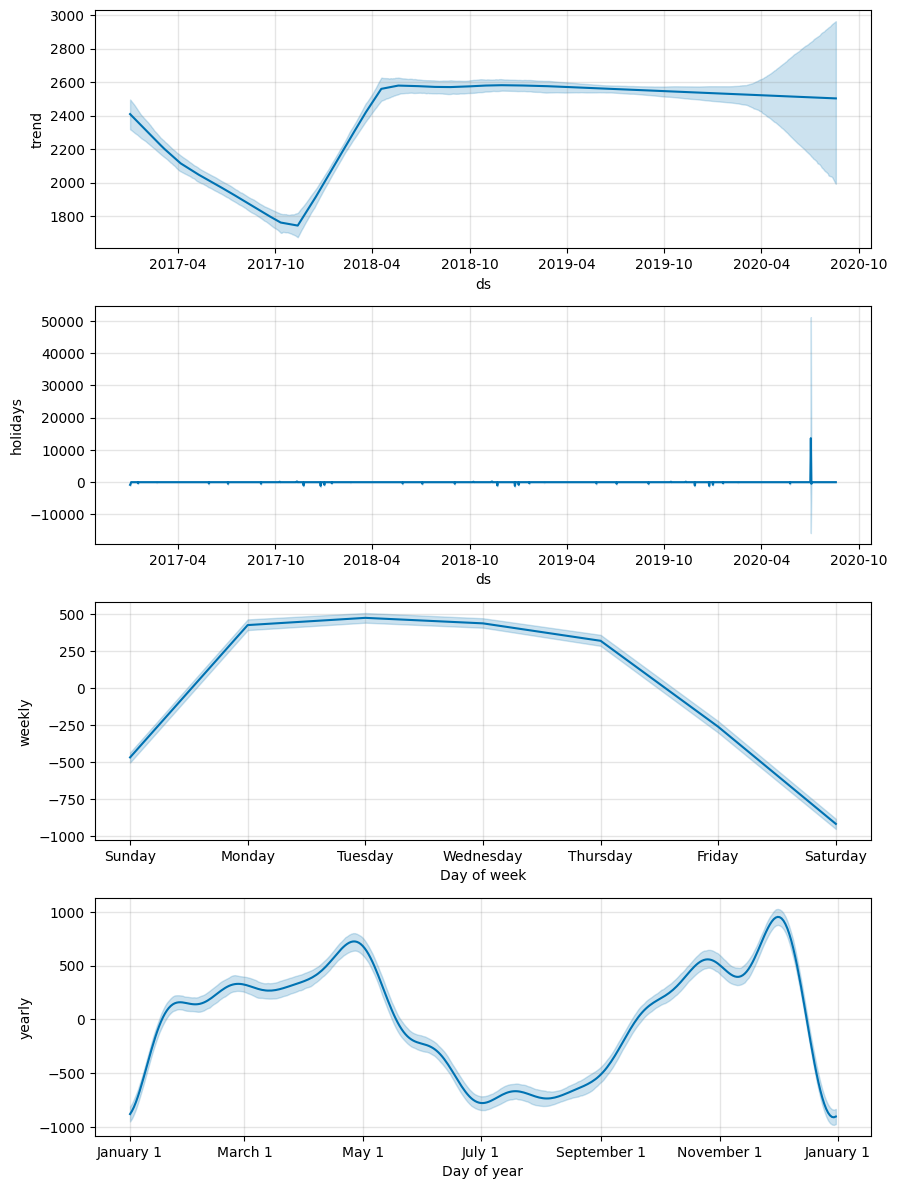

In [31]:
# Python
fig = m1.plot_components(forecast)